In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from resnet import *
from train import train, test
from dataset import *
from batchnorm import BatchNorm, CustomBatchNorm2d

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=12)

In [10]:
# model.eval()

In [11]:
# resnet18
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)

In [12]:
# print('customized batchnorm test')
# print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)
# train(model, trainloader, valloader)
# correct, total = test(model, testloader)
# print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

In [13]:
model = resnet18(pretrained=False)
initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])

norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()


In [14]:
# initial_state

In [15]:
# model = resnet18(pretrained=False, norm_layer=CustomBatchNorm2d).to(device)
# initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])
    

customized noise test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss 0.0741 val loss 0.0655 train acc 16.60 val acc 24.37 lr 0.1000
Epoch 2 of 32
train loss 0.0532 val loss 0.0557 train acc 26.44 val acc 28.43 lr 0.1000
Epoch 3 of 32
train loss 0.0476 val loss 0.0504 train acc 33.44 val acc 34.47 lr 0.1000
Epoch 4 of 32
train loss 0.0420 val loss 0.0461 train acc 39.42 val acc 39.52 lr 0.1000
Epoch 5 of 32
train loss 0.0380 val loss 0.0426 train acc 43.98 val acc 42.15 lr 0.1000
Epoch 6 of 32
train loss 0.0351 val loss 0.0388 train acc 46.47 val acc 46.54 lr 0.1000
Epoch 7 of 32
train loss 0.0326 val loss 0.0362 train acc 49.81 val acc 49.62 lr 0.1000
Epoch 8 of 32
train loss 0.0295 val loss 0.0369 train acc 53.66 val acc 49.40 lr 0.1000
Epoch 9 of 32
train loss 0.0232 val loss 0.0288 train acc 62.72 val acc 56.75 lr 0.0100
Epoch 10 of 32
train loss 0.0209 val loss 0.0278 train acc 66.41 val acc 57.96 lr 0.0100
Epoch 11 of 32
train loss 0.0197 val loss 0.0284 train acc 67.78 val acc 59.50 lr 0.0100
Epoch 12 of 32
train loss 0.0188 val loss 0.

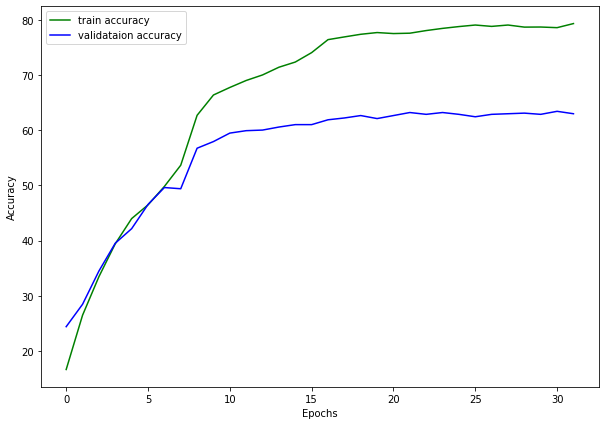

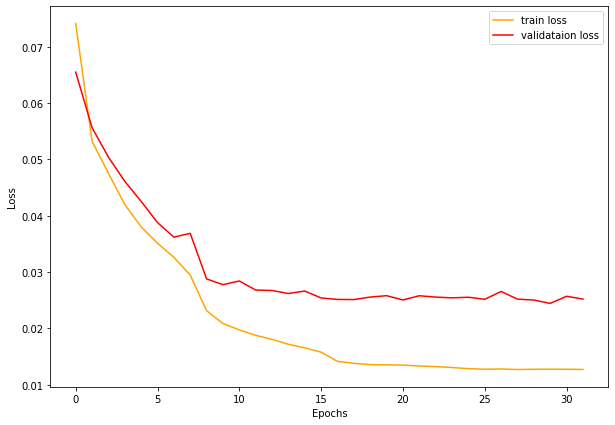

In [16]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized noise test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0686 val loss 0.0534 train acc 18.43 val acc 28.21 lr 0.1000
Epoch 2 of 32
train loss 0.0469 val loss 0.0456 train acc 34.35 val acc 39.52 lr 0.1000
Epoch 3 of 32
train loss 0.0398 val loss 0.0425 train acc 41.71 val acc 41.16 lr 0.1000
Epoch 4 of 32
train loss 0.0352 val loss 0.0382 train acc 47.08 val acc 44.90 lr 0.1000
Epoch 5 of 32
train loss 0.0316 val loss 0.0345 train acc 51.24 val acc 48.52 lr 0.1000
Epoch 6 of 32
train loss 0.0274 val loss 0.0325 

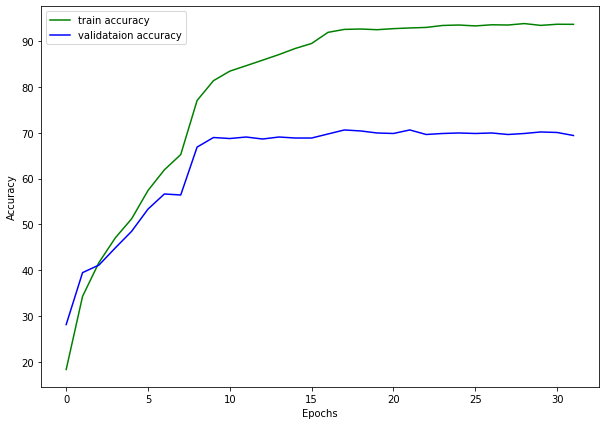

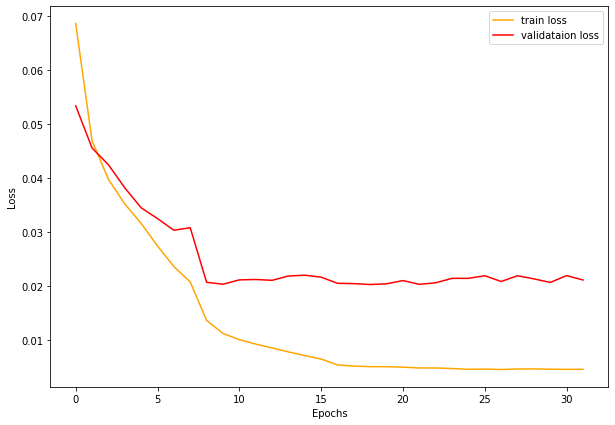

In [17]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0609 val loss 0.0548 train acc 21.90 val acc 27.77 lr 0.1000
Epoch 2 of 32
train loss 0.0454 val loss 0.0455 train acc 35.11 val acc 38.75 lr 0.1000
Epoch 3 of 32
train loss 0.0396 val loss 0.0428 train acc 41.56 val acc 41.93 lr 0.1000
Epoch 4 of 32
train loss 0.0340 val loss 0.0342 train acc 48.20 val acc 48.52 lr 0.1000
Epoch 5 of 32
train loss 0.0294 val loss 0.0347 train acc 53.70 val acc 51.81 lr 0.1000
Epoch 6 of 32
train loss 0.0253 val loss 0.0326 train acc 58.75 val ac

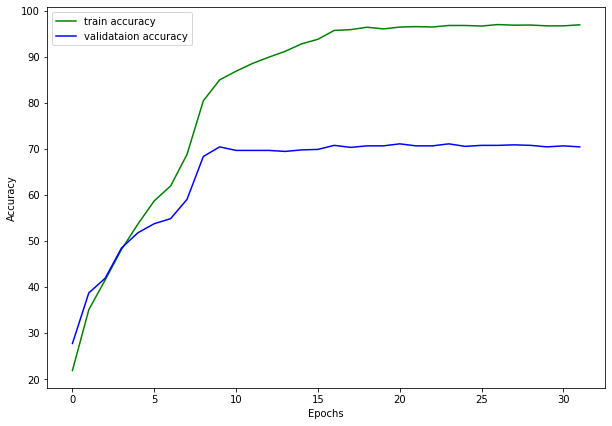

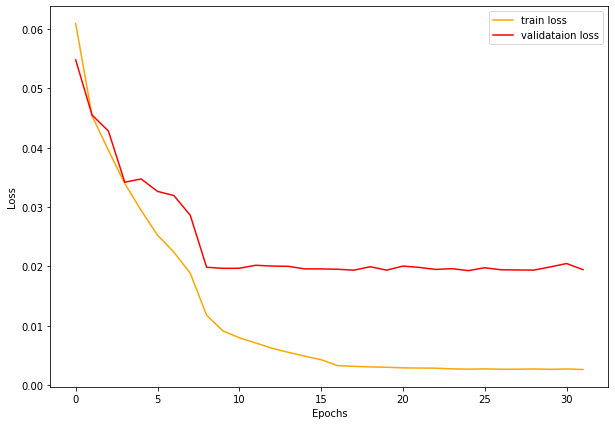

In [18]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0697 val loss 0.0626 train acc 17.54 val acc 18.00 lr 0.1000
Epoch 2 of 32
train loss 0.0488 val loss 0.0492 train acc 32.50 val acc 34.14 lr 0.1000
Epoch 3 of 32
train loss 0.0425 val loss 0.0444 train acc 38.50 val acc 38.75 lr 0.1000
Epoch 4 of 32
train loss 0.0388 val loss 0.0421 train acc 43.17 val acc 41.82 lr 0.1000
Epoch 5 of 32
train loss 0.0352 val loss 0.0452 train acc 46.81 val acc 41.16 lr 0.1000
Epoch 6 of 32
train loss 0.0321 val loss 0.0377 train acc 50.54 val ac

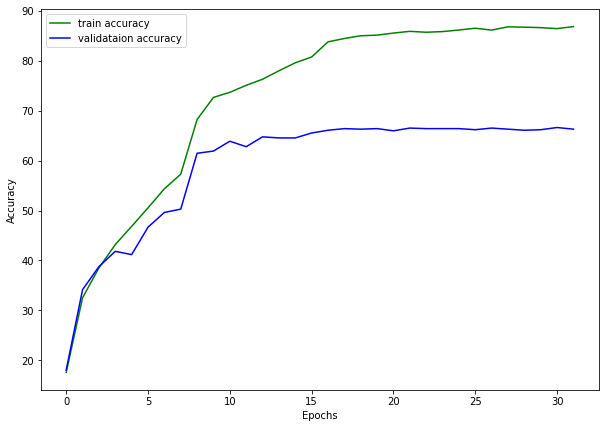

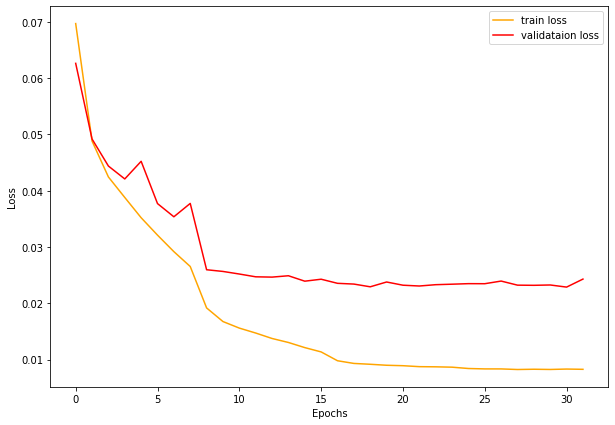

In [19]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))